In [53]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
# Data Loading
from sklearn.datasets import fetch_20newsgroups

# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

# Model/estimator
from sklearn.naive_bayes import MultinomialNB

# Pipeline utility
from sklearn.pipeline import make_pipeline

# Model evaluation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Plotting library
import matplotlib.pyplot as plt


In [24]:
#Dataset:20 newsgroup dataset are used for classification

#Download 20 newsgroup dataset with fetch_20newsgroups API

data = fetch_20newsgroups()

In [31]:
#Print the target names
from pprint import pprint
pprint(list(data.target_names))


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [32]:
#There are 20 categories in the dataset.Select 4 of these categories and download training and test sets.


categories = ['talk.religion.misc', 'soc.religion.christian',
             'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


In [33]:
# sample training document.
print(train.data[5])


From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [34]:
#Data preprocessing and modelling
#Tfidfvectorizer - converts text input into a vector of numerical values.
#Multinomial naive bayes classifier for categorizing documents from 20newsgroup corpus.

model = make_pipeline(TfidfVectorizer(), MultinomialNB())


In [39]:
#Train the model

model.fit(train.data, train.target)
labels=model.predict(test.data)


In [40]:
#Make use of predict function on pipeline for predicting category of a test string.

def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]


In [41]:
predict_category('sending a payload to the ISS')


'sci.space'

In [42]:
predict_category('discussing islam vs atheism')


'soc.religion.christian'

In [43]:
predict_category('determining the screen resolution')



'comp.graphics'

Accuracy: 80.16759776536313
classification report:               precision    recall  f1-score   support

           0       0.97      0.88      0.92       389
           1       0.92      0.92      0.92       394
           2       0.62      0.98      0.76       398
           3       1.00      0.19      0.32       251

    accuracy                           0.80      1432
   macro avg       0.88      0.75      0.73      1432
weighted avg       0.86      0.80      0.77      1432



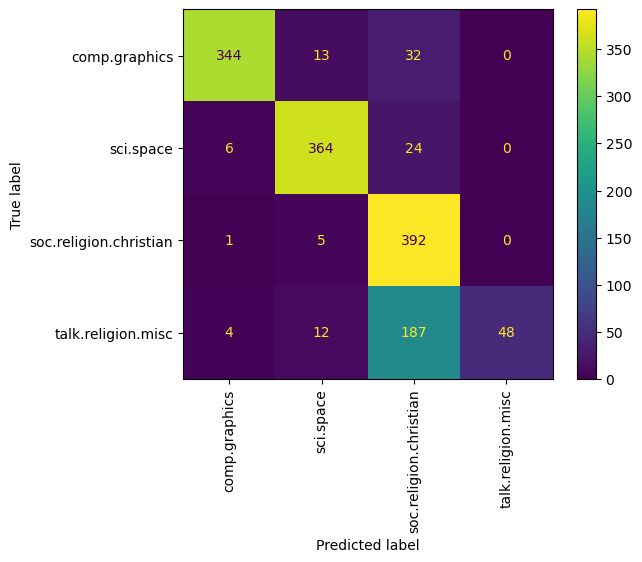

In [52]:
#Model Evaluation
print('Accuracy:',accuracy_score(test.target,labels)*100)
ConfusionMatrixDisplay.from_estimator(model, test.data, test.target,display_labels=test.target_names,xticks_rotation='vertical');
print('classification report:',classification_report(test.target,labels))